In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import sklearn.decomposition
import random 
from ensemble_analysis_lib import *
from  plot import *
from functions import *
import mdtraj














## Structural ensemble of NUL (884-993), in denatured conditions (PED00144) and in native conditions (PED00145)
#### In the following analysis, we aim to compare the structural conformations of NUL (884-993) under denatured conditions (PED00144) and native conditions (PED00145). Of each protein, we will conduct the analysis utilizing one of its ensembles, aiming to discern the distinctions between the diverse protein conditions.
Before proceeding with the comparison, it is essential to understand the fundamental differences between denatured and native conditions. 

**Denatured Conditions:**
Under denatured conditions, the protein undergoes a loss of its native three-dimensional structure due to factors such as extreme pH, high temperatures, or denaturing agents such as urea or sodium dodecyl sulfate (SDS). These agents disrupt the non-covalent interactions that maintain the protein's three-dimensional structure, leading to the release of hydrophobic interactions and denaturation of secondary and tertiary structures. As a result, the protein becomes more extended and flexible, assuming different and often disordered conformations.

**Native Conditions:**
Under native conditions, the protein maintains its native and functional three-dimensional structure. Native conditions are those in which the protein is stable and biologically active. Non-covalent interactions, such as hydrogen bonds, electrostatic interactions, and hydrophobic interactions, maintain the protein's three-dimensional structure and are essential for its stability and functionality. Native proteins may exhibit a well-defined structure, with ordered and well-defined regions such as alpha helices and beta sheets.

#### Alpha carbon

In [2]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00144e001','PED00145e001']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/NUL"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}


In [3]:
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/NUL/PED00144e001.dcd.


- Found 8003 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/NUL/PED00145e001.dcd.
- Found 5938 conformations.


In [4]:
trajectories= pipeline.trajectories
trajectories

{'PED00144e001': <mdtraj.Trajectory with 8003 frames, 1606 atoms, 116 residues, without unitcells at 0x1358a6510>,
 'PED00145e001': <mdtraj.Trajectory with 5938 frames, 1606 atoms, 116 residues, without unitcells at 0x1376adaf0>}

In [12]:
ca_xyz_dict=dict_coord(trajectories)
type(ca_xyz_dict)

dict

### Distance matrix and visualization

In [13]:
distance_matrix_dict=calculate_distance_matrix_dict(ca_xyz_dict)
distance_matrix_dict

{'PED00144e001': array([[[ 0.        ,  0.38066226,  0.62337625, ..., 11.13824   ,
          11.233604  , 11.070058  ],
         [ 0.38066226,  0.        ,  0.3804027 , ..., 11.018442  ,
          11.113319  , 10.944321  ],
         [ 0.62337625,  0.3804027 ,  0.        , ..., 11.02297   ,
          11.129356  , 10.967879  ],
         ...,
         [11.13824   , 11.018442  , 11.02297   , ...,  0.        ,
           0.37993464,  0.68902373],
         [11.233604  , 11.113319  , 11.129356  , ...,  0.37993464,
           0.        ,  0.38044584],
         [11.070058  , 10.944321  , 10.967879  , ...,  0.68902373,
           0.38044584,  0.        ]],
 
        [[ 0.        ,  0.38037136,  0.7250746 , ...,  3.152753  ,
           3.3392286 ,  3.715099  ],
         [ 0.38037136,  0.        ,  0.37977   , ...,  3.2016966 ,
           3.3632689 ,  3.7339108 ],
         [ 0.7250746 ,  0.37977   ,  0.        , ...,  3.065978  ,
           3.2024593 ,  3.5646825 ],
         ...,
         [ 3.1527

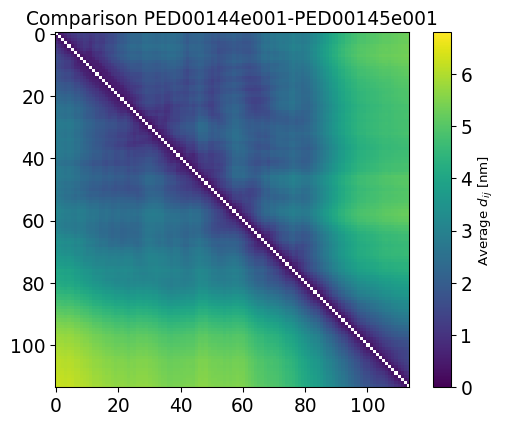

In [14]:
plot_average_dmap_comparison(distance_matrix_dict['PED00144e001'],distance_matrix_dict['PED00145e001'],'Comparison PED00144e001-PED00145e001')

### Contact map and visualization

In [15]:
contact_map_dict=get_contact_map_dict(distance_matrix_dict)
contact_map_dict

{'PED00144e001': array([[1.00000125e+00, 1.00000125e+00, 1.00000125e+00, ...,
         7.50968387e-04, 1.25078096e-03, 1.00087467e-03],
        [1.00000125e+00, 1.00000125e+00, 1.00000125e+00, ...,
         2.51155817e-04, 3.76108959e-04, 1.12582781e-03],
        [1.00000125e+00, 1.00000125e+00, 1.00000125e+00, ...,
         8.75921529e-04, 7.50968387e-04, 1.00087467e-03],
        ...,
        [7.50968387e-04, 2.51155817e-04, 8.75921529e-04, ...,
         1.00000125e+00, 1.00000125e+00, 1.00000125e+00],
        [1.25078096e-03, 3.76108959e-04, 7.50968387e-04, ...,
         1.00000125e+00, 1.00000125e+00, 1.00000125e+00],
        [1.00087467e-03, 1.12582781e-03, 1.00087467e-03, ...,
         1.00000125e+00, 1.00000125e+00, 1.00000125e+00]]),
 'PED00145e001': array([[1.00000168e+00, 1.00000168e+00, 1.00000168e+00, ...,
         5.06904682e-04, 5.06904682e-04, 8.43718424e-04],
        [1.00000168e+00, 1.00000168e+00, 1.00000168e+00, ...,
         1.70090940e-04, 3.38497811e-04, 1.70090940

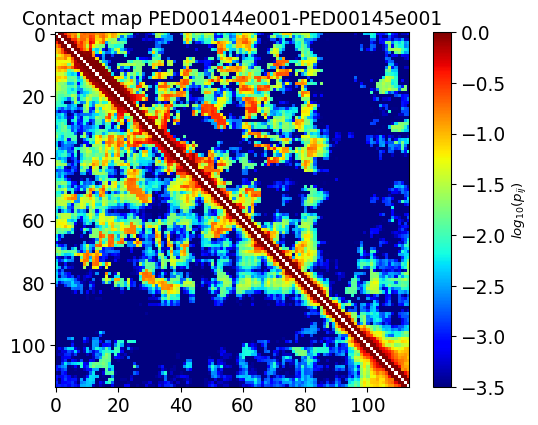

In [16]:
plot_cmap_comparison(contact_map_dict['PED00144e001'],contact_map_dict['PED00145e001'],'Contact map PED00144e001-PED00145e001')

### Distribution

In [17]:
flattened_dict=flatten_matrices(distance_matrix_dict)
flattened_dict

{'PED00144e001': array([0.        , 0.38066226, 0.62337625, ..., 0.53022784, 0.37923157,
        0.        ], dtype=float32),
 'PED00145e001': array([0.        , 0.3795469 , 0.6494121 , ..., 0.7158088 , 0.38097134,
        0.        ], dtype=float32)}

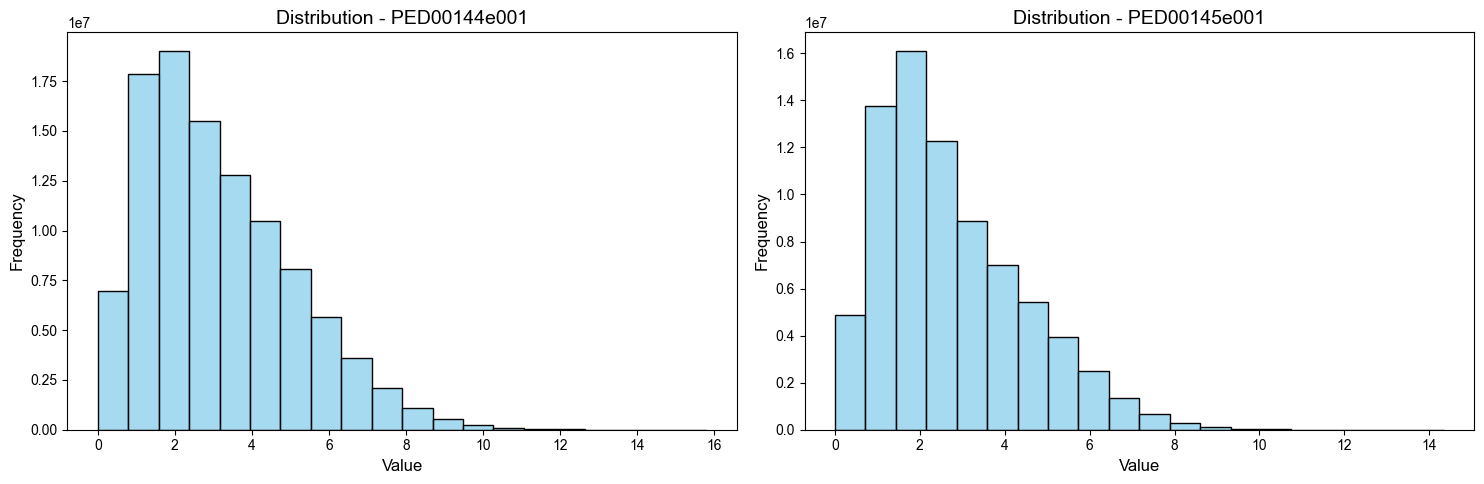

In [18]:
plot_flattened_data(flattened_dict)

In [19]:
plot_boxplot(flattened_dict)

: 

In the denatured data, a more widespread distribution of density and variable peaks are observed, indicative of greater conformational heterogeneity and lower structural stability.

On the other hand, in the native data, a more concentrated density with distinct peaks between the ensembles is observed, suggesting greater conformational homogeneity and higher structural stability.



### Side chain center of mass

In [ ]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00144e001','PED00145e001']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/NUL"

# Featurization options.
featurization = "sc_center_of_mass_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}

In [ ]:
traj=pipeline.trajectories
traj

In [ ]:
import random

def estrai_frames_casuali(traj, num_frames_da_selezionare):
    frames_casuali = {}
    for chiave, traiettoria in traj.items():
        frames_selezionati = random.sample(range(len(traiettoria)), num_frames_da_selezionare)
        frames_casuali[chiave] = traiettoria[frames_selezionati]
    return frames_casuali

random_traj=estrai_frames_casuali(traj, 100)

In [ ]:
side_center_mass= compute_side_center_mass_dict(random_traj)
side_center_mass

### Distance matrix and visualizations

In [ ]:
distance_matrix_side_center_mass_dict=calculate_distance_matrix_dict(side_center_mass)
distance_matrix_side_center_mass_dict

In [ ]:
plot_average_dmap_comparison(distance_matrix_side_center_mass_dict['PED00144e001'],distance_matrix_side_center_mass_dict['PED00145e001'],'Comparison PED00144e001-PED00145e001')

### Contact map and visualizations

In [ ]:
contact_map_side_chain_dict=get_contact_map_dict(distance_matrix_side_center_mass_dict)
contact_map_side_chain_dict

In [ ]:
plot_cmap_comparison(contact_map_side_chain_dict['PED00144e001'],contact_map_side_chain_dict['PED00145e001'],'Contact map PED00144e001-PED00145e001')

### Distribution

In [ ]:
flattened_side_chain_mass_dict=flatten_matrices(distance_matrix_side_center_mass_dict)
flattened_side_chain_mass_dict

In [ ]:
plot_flattened_data(flattened_side_chain_mass_dict)

In [ ]:
plot_boxplot(flattened_side_chain_mass_dict)

# Angles analysis-Phi and Psi angles

In [4]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00144e001','PED00145e001']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/NUL"

# Featurization options.
featurization = "phi_psi"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}

In [5]:
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/NUL/PED00144e001.dcd.
- Found 8003 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/NUL/PED00145e001.dcd.
- Found 5938 conformations.


In [6]:
trajectories_angles= pipeline.trajectories
trajectories_angles

{'PED00144e001': <mdtraj.Trajectory with 8003 frames, 1606 atoms, 116 residues, without unitcells at 0x10bcdf590>,
 'PED00145e001': <mdtraj.Trajectory with 5938 frames, 1606 atoms, 116 residues, without unitcells at 0x13116b200>}

In [7]:
dict_phi_psi_splitted=featurize_and_split_phi_psi(trajectories_angles)

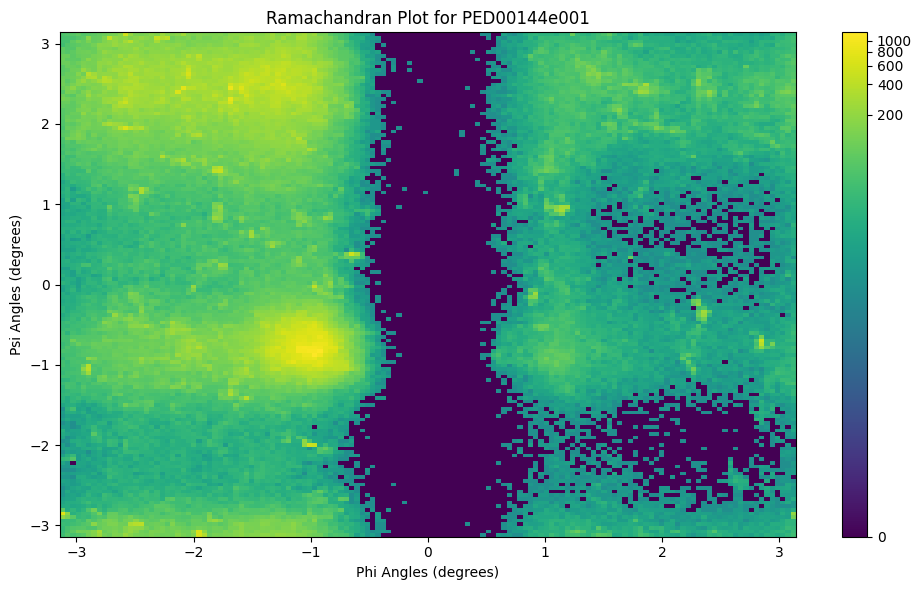

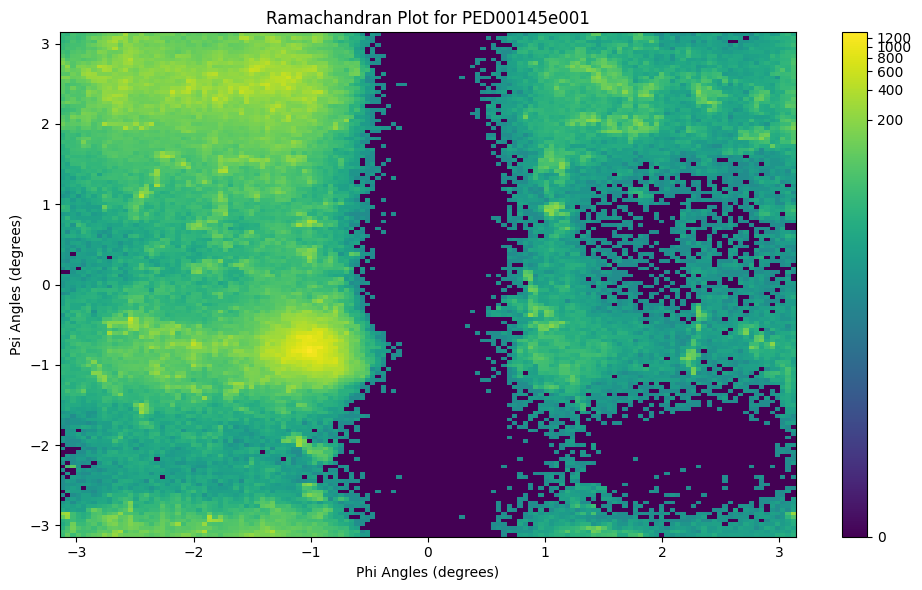

In [8]:
Ramachandran_plot_phi_psi(dict_phi_psi_splitted)

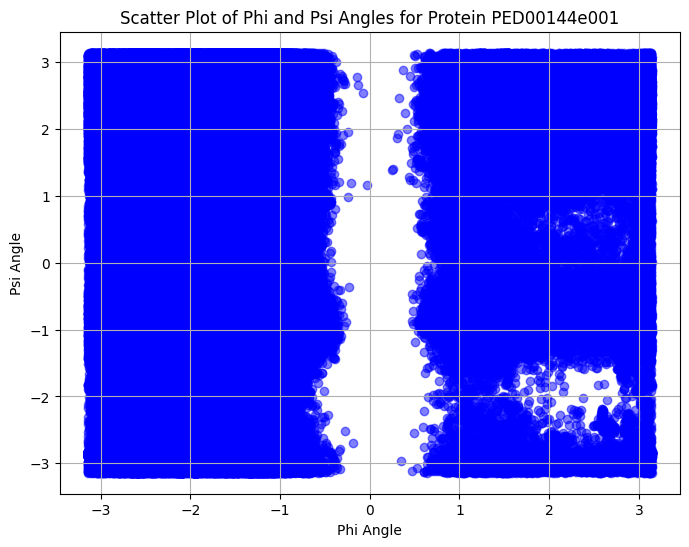

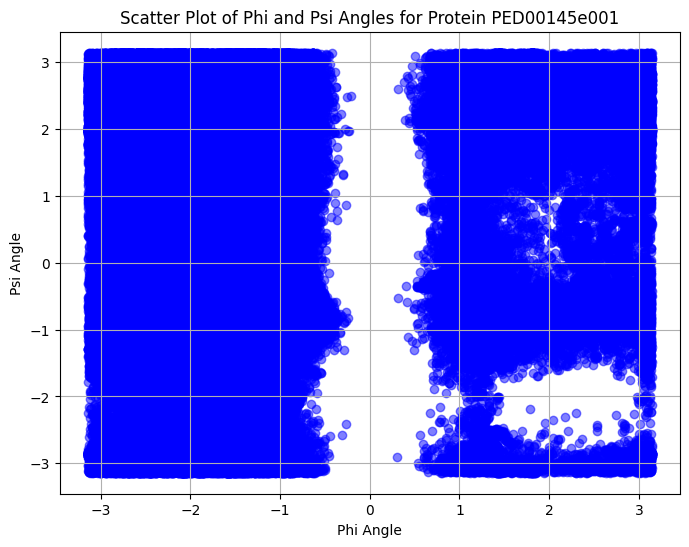

In [9]:
scatter_plot_phi_psi(dict_phi_psi_splitted)

In [10]:
four_consecutive_indices_Calpha=consecutive_4_indices_of_Calpha(trajectories_angles)

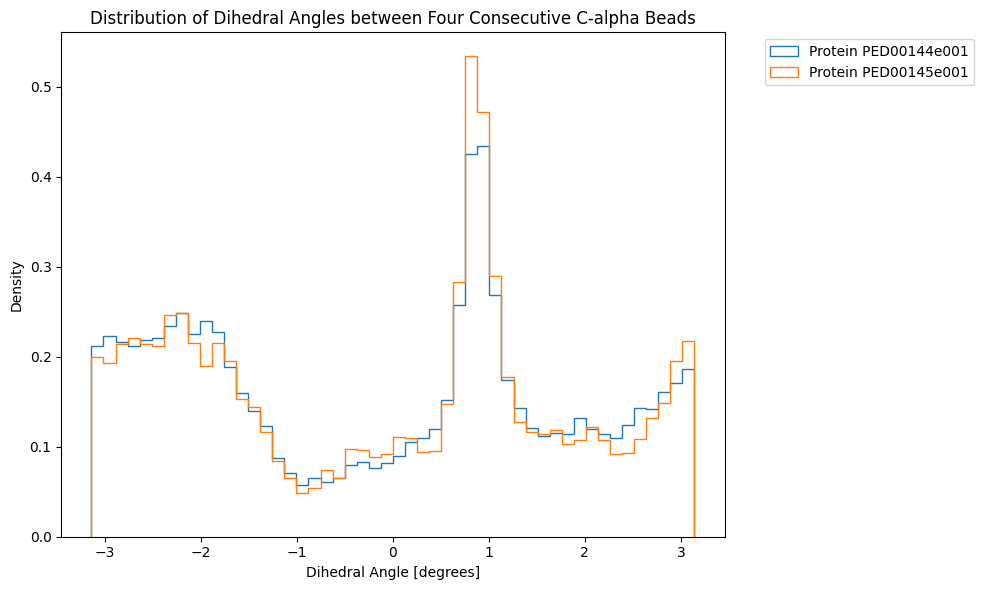

In [11]:
plot_distribution_dihedral_angles(trajectories_angles,four_consecutive_indices_Calpha)

## Global analysis
### Radius-of-gyration

In [2]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00144e001','PED00145e001']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/NUL"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/NUL/PED00144e001.dcd.
- Found 8003 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/NUL/PED00145e001.dcd.
- Found 5938 conformations.


In [3]:
trajectories= pipeline.trajectories
Rgs_dict=rg_calculator_dict(trajectories)

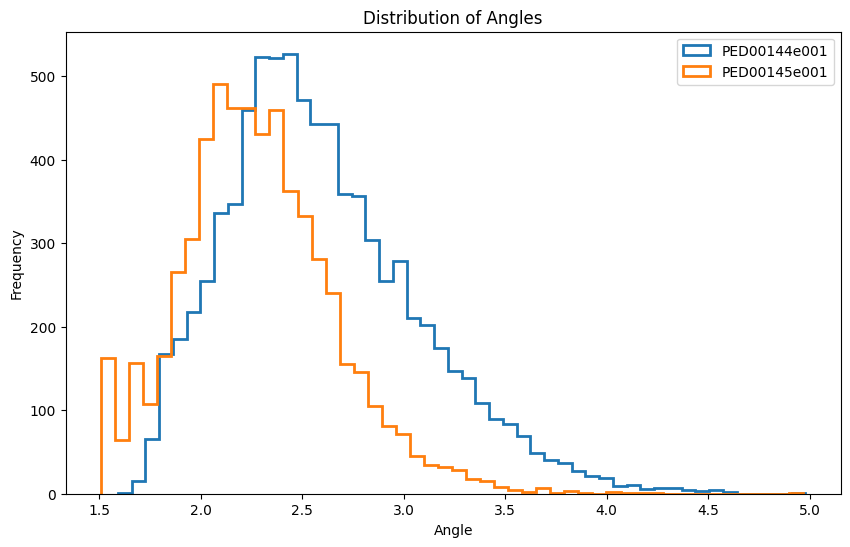

In [14]:
plot_distribution_of_Rgs(Rgs_dict)

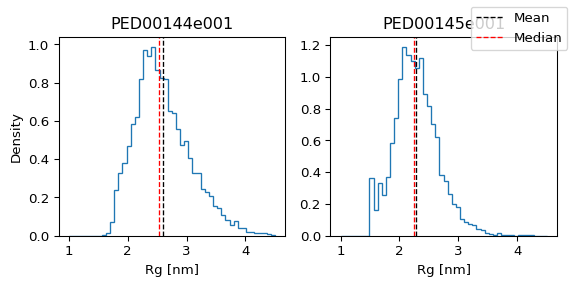

In [15]:
plot_rg_comparison(Rgs_dict)

### Alpha-helix content

In [16]:
dssp_dict=get_dssp_dict(trajectories)

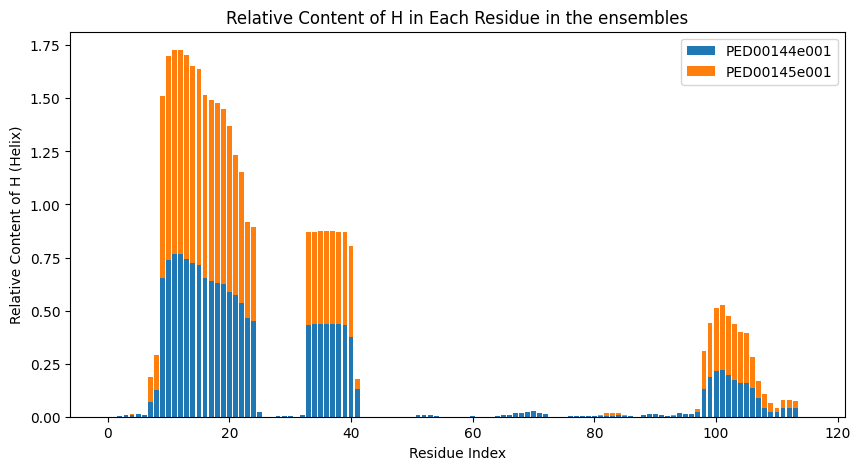

In [17]:
plot_relative_helix_content_multiple_proteins(dssp_dict)

### Asphericity

In [4]:
gyration_tensors_dict=get_gyration_tensors_dict(trajectories)
asphericity_dict=calculate_asphericity_dict(gyration_tensors_dict)

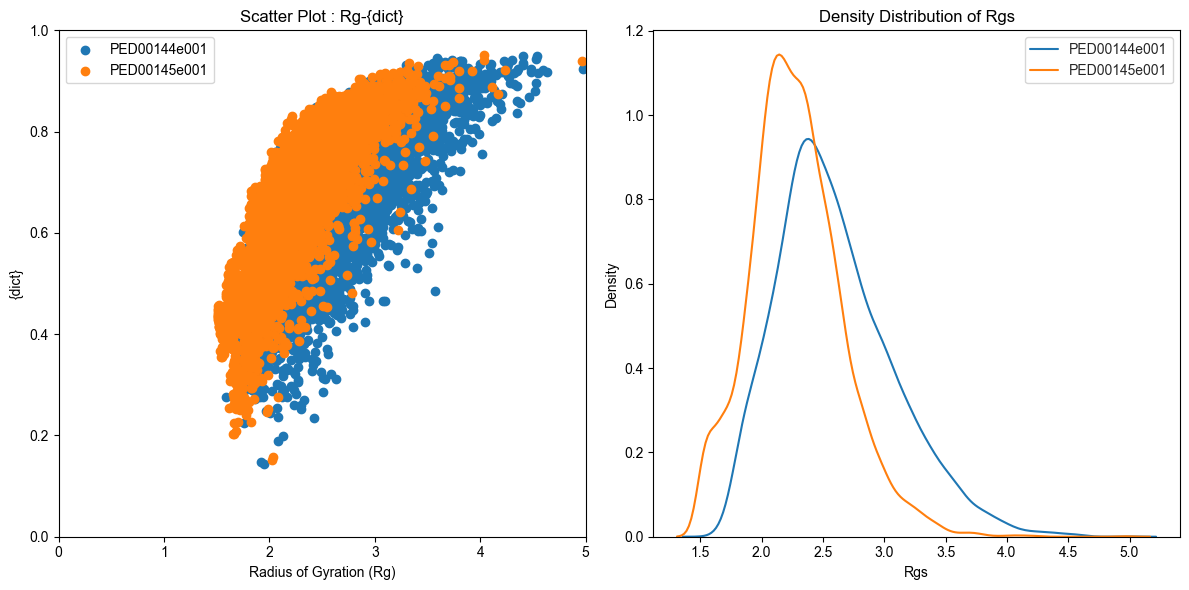

In [5]:
scatterplot_rg_asphericity(Rgs_dict,asphericity_dict)

## Prolateness

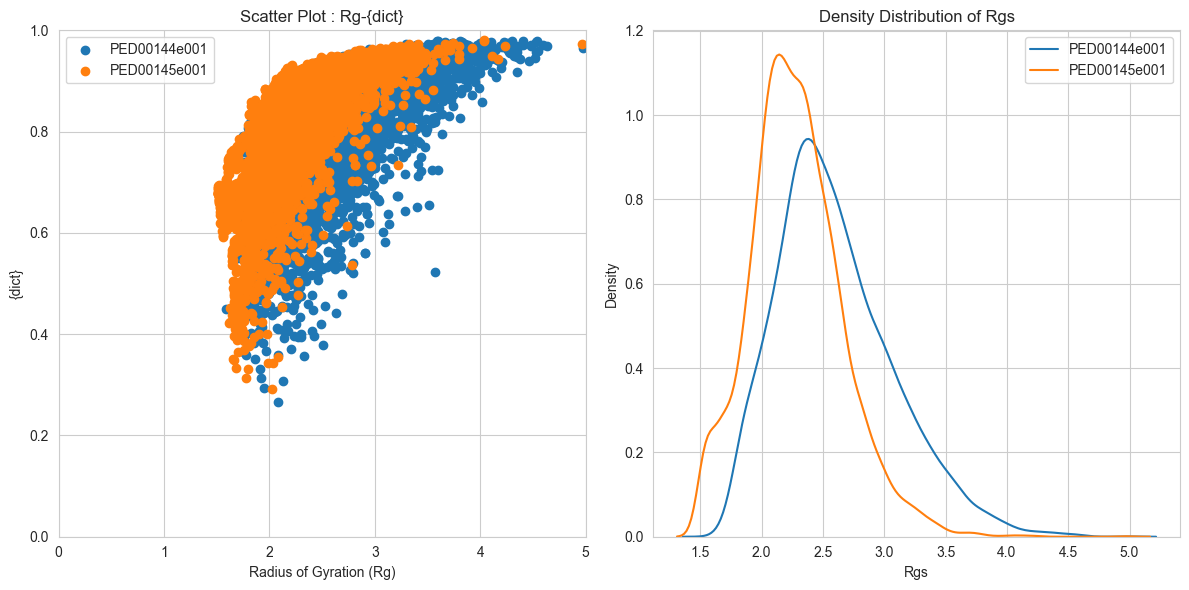

In [6]:
gyration_tensors_dict=get_gyration_tensors_dict(trajectories)
prolateness_dict=calculate_prolateness_dict(gyration_tensors_dict)
scatterplot_rg_asphericity(Rgs_dict,prolateness_dict)

## End-to-End distance

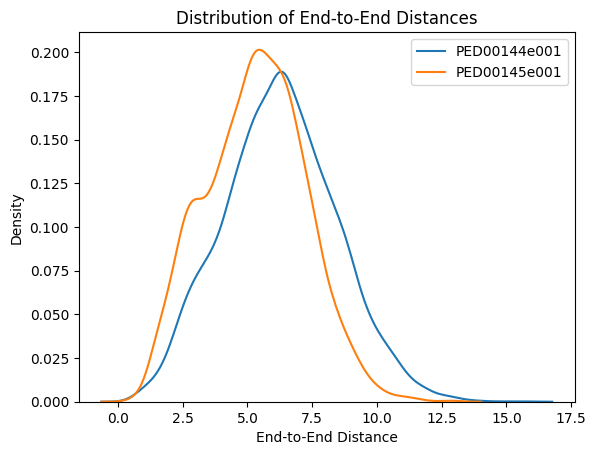

In [5]:
calculate_and_plot_end_to_end_distance(trajectories)